In [3]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

# Example usage
weights = np.array([0.5, -0.5, 1.0])
bias = 0.1
neuron = Neuron(weights, bias)
inputs = np.array([2, 3, -1])
output = neuron.feedforward(inputs)
print(f"Neuron output: {output}")

Neuron output: 0.19781611144141825


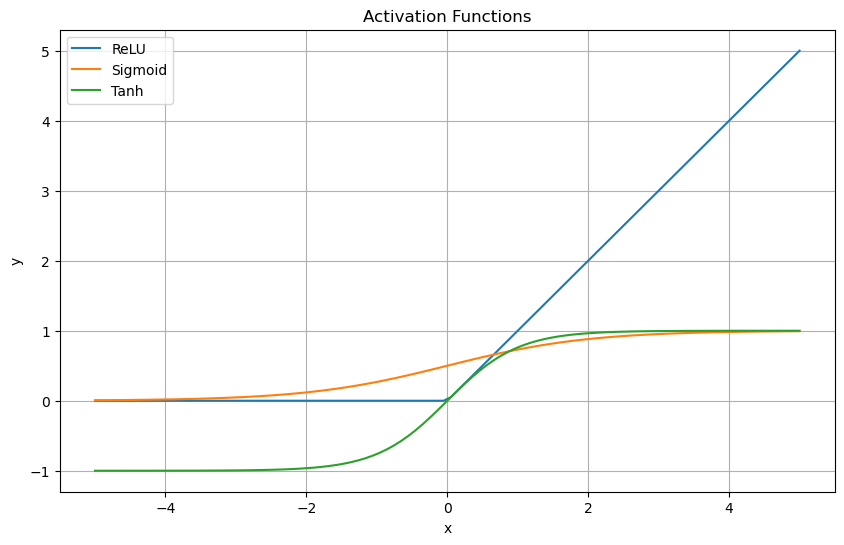

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.legend()
plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [5]:
import numpy as np

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        
        dZ1 = np.dot(dZ2, self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        
        self.W2 -= learning_rate * dW2
        self.W1 -= learning_rate * dW1

# Example usage
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = SimpleNeuralNetwork(3, 4, 1)
for _ in range(10000):
    output = nn.forward(X)
    nn.backward(X, y, 0.1)

print("Final predictions:")
print(nn.forward(X))

Final predictions:
[[0.00582401]
 [0.98657682]
 [0.98906446]
 [0.01315963]]


In [8]:
import tensorflow as tf

def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8764 - loss: 0.3906 - val_accuracy: 0.9817 - val_loss: 0.0607
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9836 - loss: 0.0519 - val_accuracy: 0.9859 - val_loss: 0.0486
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9884 - loss: 0.0357 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9920 - loss: 0.0252 - val_accuracy: 0.9877 - val_loss: 0.0402
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9886 - val_loss: 0.0371
313/313 - 3s - 10ms/step - accuracy: 0.9903 - loss: 0.0306
Test accuracy: 0.9902999997138977


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform, randint
import numpy as np

# Generate sample data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)

# Define the model
model = MLPClassifier(max_iter=1000)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.001),
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': uniform(0.001, 0.01)
}

# Set up the random search
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2
)

# Perform the search
random_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'activation': 'relu', 'alpha': 0.0005359570961401892, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.010219751834912801, 'solver': 'sgd'}
Best score: 0.5400190609771448


C:\Users\Dell\Videos\AnyDesk\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


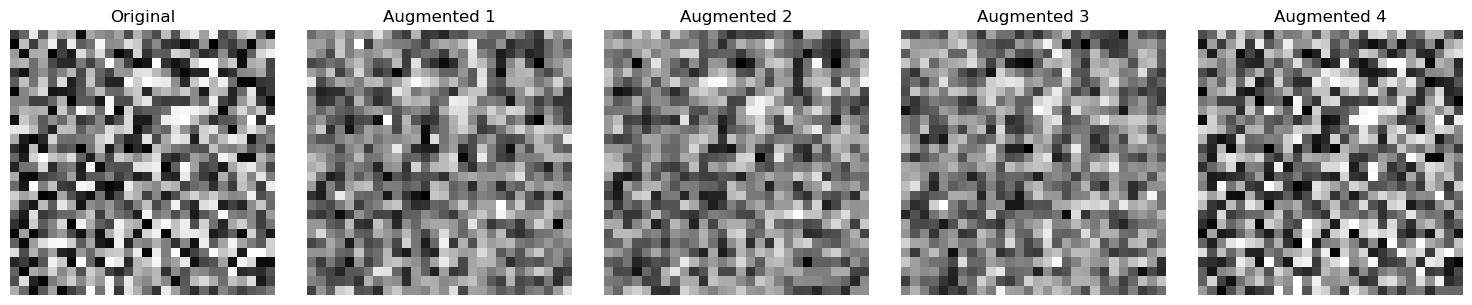

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

def augment_image(image):
    # Rotate
    angle = np.random.uniform(-30, 30)
    rotated = transform.rotate(image, angle, mode='wrap')
    
    # Flip horizontally
    if np.random.rand() > 0.5:
        rotated = np.fliplr(rotated)
    
    # Add noise
    noise = np.random.normal(0, 0.05, rotated.shape)
    noisy = np.clip(rotated + noise, 0, 1)
    
    return noisy

# Generate a sample image
original = np.random.rand(28, 28)

# Create augmented versions
augmented = [augment_image(original) for _ in range(4)]

# Plot original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original')
for i, img in enumerate(augmented, 1):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Augmented {i}')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

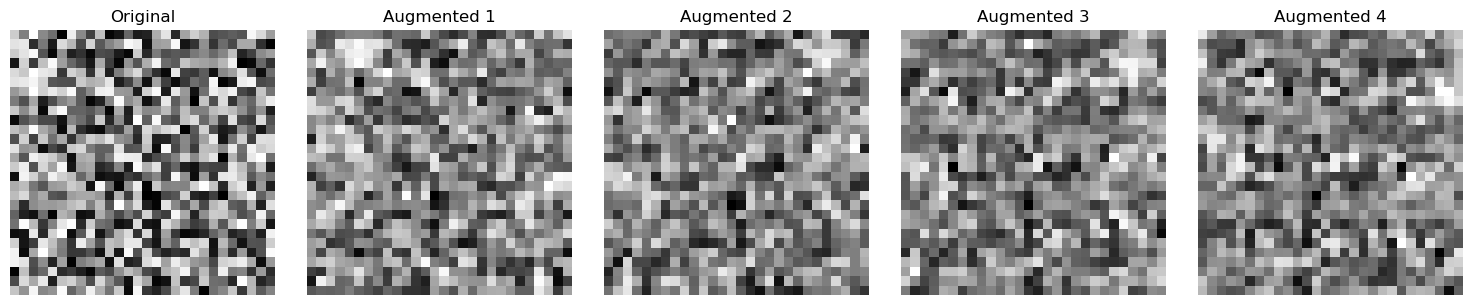

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

def augment_image(image):
    # Rotate
    angle = np.random.uniform(-30, 30)
    rotated = transform.rotate(image, angle, mode='wrap')
    
    # Flip horizontally
    if np.random.rand() > 0.5:
        rotated = np.fliplr(rotated)
    
    # Add noise
    noise = np.random.normal(0, 0.05, rotated.shape)
    noisy = np.clip(rotated + noise, 0, 1)
    
    return noisy

# Generate a sample image
original = np.random.rand(28, 28)

# Create augmented versions
augmented = [augment_image(original) for _ in range(4)]

# Plot original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original')
for i, img in enumerate(augmented, 1):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Augmented {i}')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

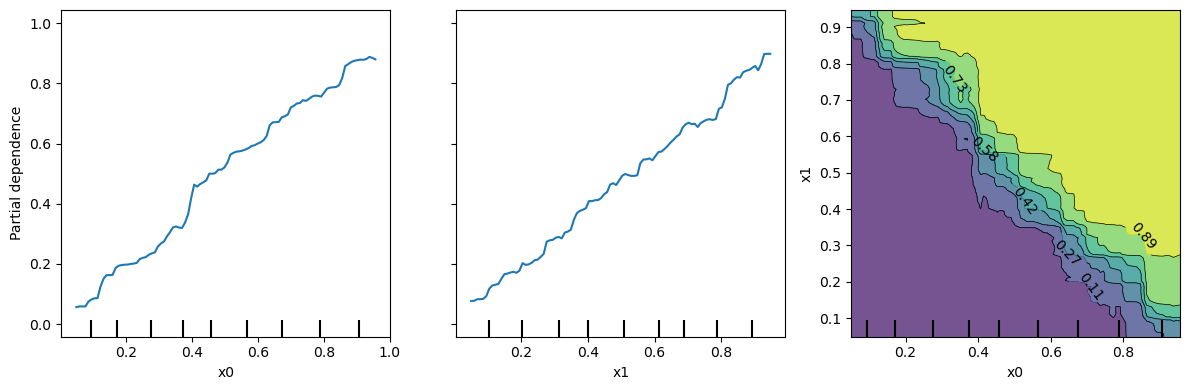

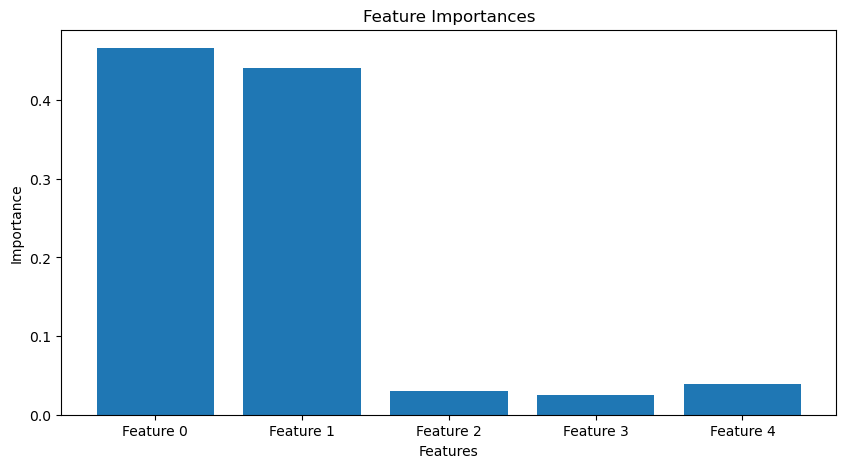

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# Generate sample data
X = np.random.rand(1000, 5)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Compute partial dependence plots
features = [0, 1, (0, 1)]  # Individual and interaction effects
fig, ax = plt.subplots(figsize=(12, 4))
display = PartialDependenceDisplay.from_estimator(
    clf, X, features, ax=ax
)
plt.tight_layout()
plt.show()

# Feature importance
importances = clf.feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
plt.figure(figsize=(10, 5))
plt.bar(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()